In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
%cd /content/drive/My\ Drive/DL_Project
!git pull

/content/drive/My Drive/DL_Project
Already up to date.


In [0]:
# !mkdir data
# %cd data
# !gsutil -m cp gs://quickdraw_dataset/full/numpy_bitmap/*.npy .
# %cd ..

In [2]:
import numpy as np
import torch
import os
from matplotlib import pyplot as plt
from torch.utils.data import Dataset, DataLoader

%matplotlib inline 

In [3]:
class SketchDataSet(Dataset):
    """ Sketch datset """
    def __init__(self, directory):
        self.num_class = 18
        self.num_images = 0
        self.fnames = [None]*18
        self.fsize = [None]*18
        self.fimgsize = [None]*18
        
        i = 0
        for filename in os.listdir(directory):
            if filename.endswith(".npy"): 
                data = np.load(directory + filename)
                self.num_images += len(data)
                self.fnames[i] = directory + filename
                self.fsize[i] = len(data)
                self.fimgsize[i] = self.num_images
            i += 1
            
    def size_of_class(self, ind):
        return self.fsize[ind]

    def __len__(self):
        return self.num_images

    def __getitem__(self, ind):
        for i in range(0, 18):
            if ind - self.fimgsize[i] < 0 and i == 0:
                return torch.from_numpy(np.load(self.fnames[0])[ind].reshape(28, 28) / 256), i
            elif ind - self.fimgsize[i] < 0:
                return torch.from_numpy(np.load(self.fnames[i])[ind - self.fimgsize[i-1]].reshape(28,
                                                                                                 28)), i
        return None, None

In [4]:
# If AttributeError: __enter__, update numpy version
dataset = SketchDataSet("./data/")

In [5]:
print(len(dataset))
print(dataset.size_of_class(0))

2684309
116504


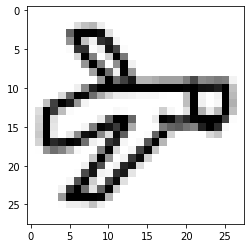

Label 1


In [8]:
data, label = dataset[116504]
plt.imshow(data, cmap='Greys')
plt.show()
print("Label {}".format(label))

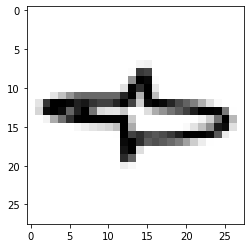

Label 0


In [23]:
data, label = dataset[13]
plt.imshow(data, cmap='Greys')
plt.show()
print("Label {}".format(label))

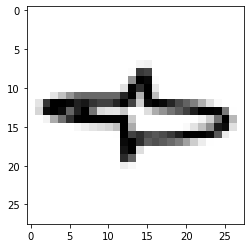

In [22]:
dat = np.load('./data/aircraft carrier.npy')
plt.imshow(dat[13].reshape(28,28), cmap='Greys')
plt.show()